# Visualisation of Pokemon

The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [archive](https://seaborn.pydata.org/archive.html).  Check your Seaborn version below.

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# see what version of Seaborn you have installed so you can find the right documentation
sns.__version__

'0.12.2'

In [4]:
# Read dataset
df = pd.read_csv('D:/Users-Data/48189111/Downloads/Pokemon.csv', index_col=0)

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [8]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

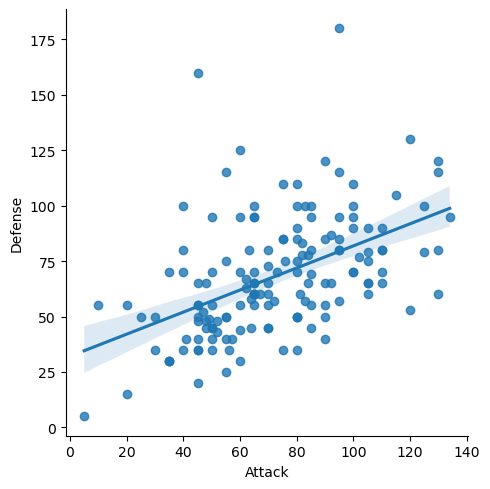

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df)

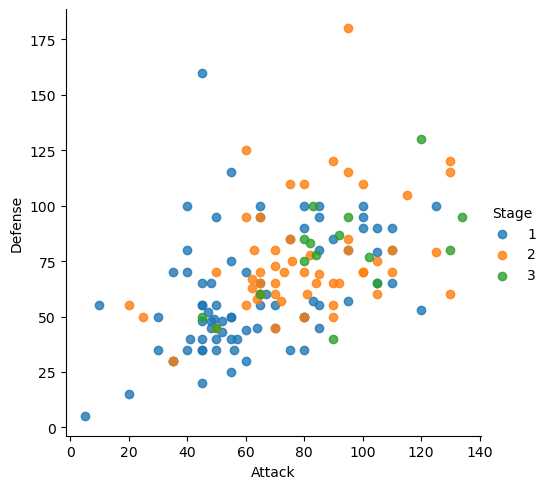

In [7]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

(0.0, 160.0)

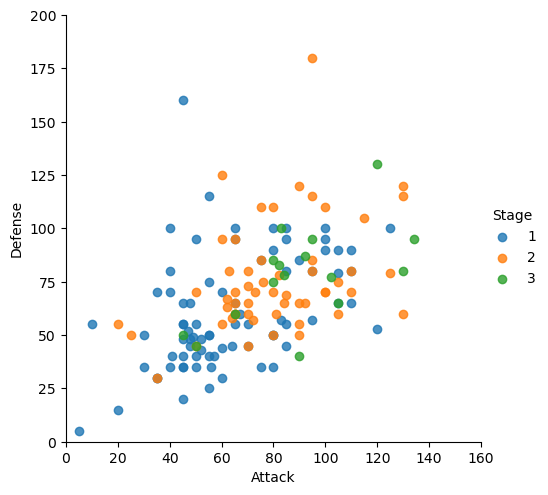

In [9]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, 200)
plt.xlim(0, 160)

<Axes: >

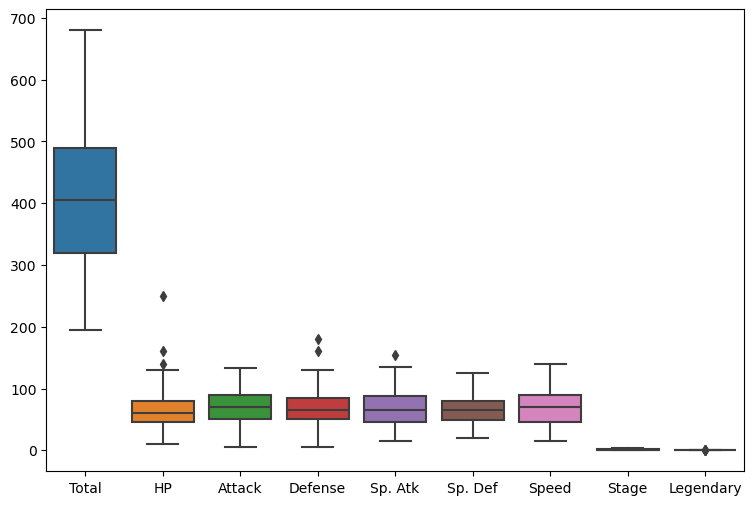

In [11]:
# Boxplot
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=df)

<Axes: >

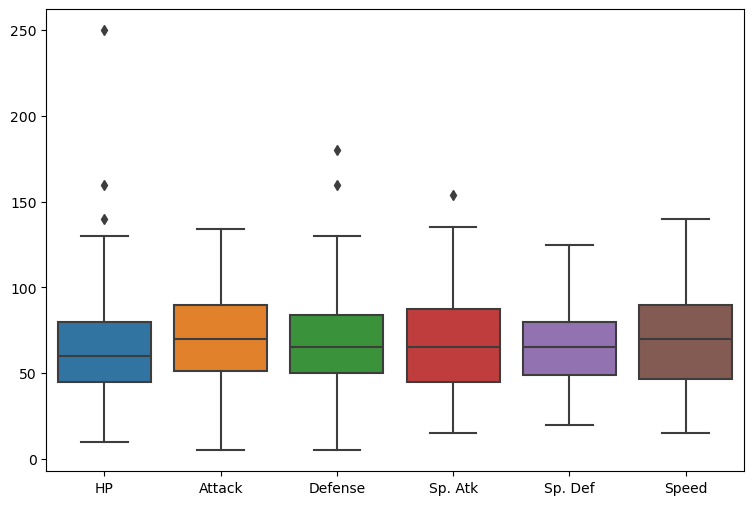

In [12]:
# Preprocess DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=stats_df)

<Axes: xlabel='Type 1', ylabel='Attack'>

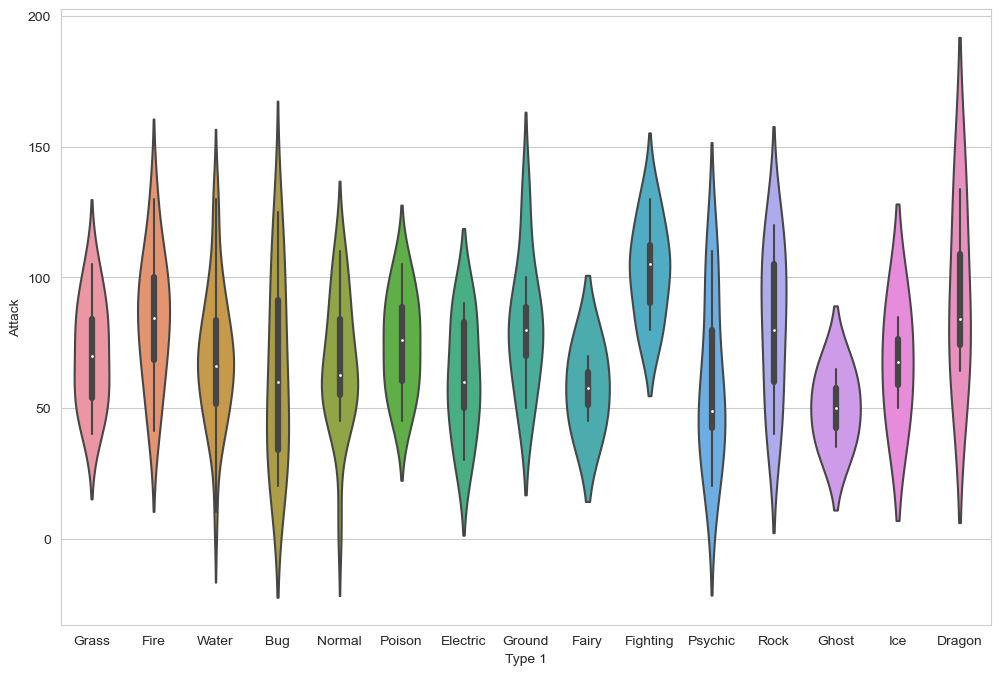

In [13]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df)

In [14]:

# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [15]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or u

<Axes: xlabel='Stat', ylabel='value'>

C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\48189111\AppData\Local\anac

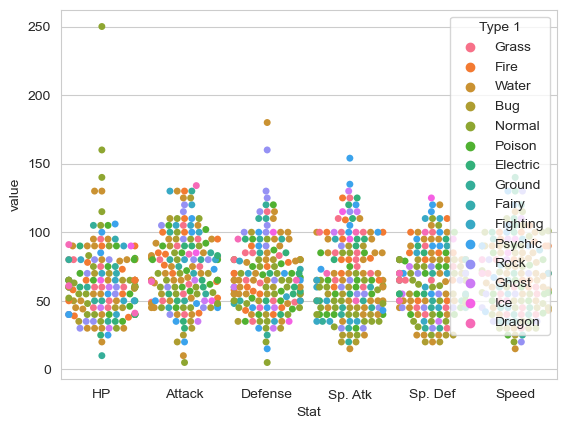

In [16]:

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://seaborn.pydata.org/archive/0.10/tutorial/aesthetics.html#seaborn-figure-styles) on that for version 0.10.

C:\Users\48189111\AppData\Local\Temp\ipykernel_2440\3546288629.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Speed)
C:\Users\48189111\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

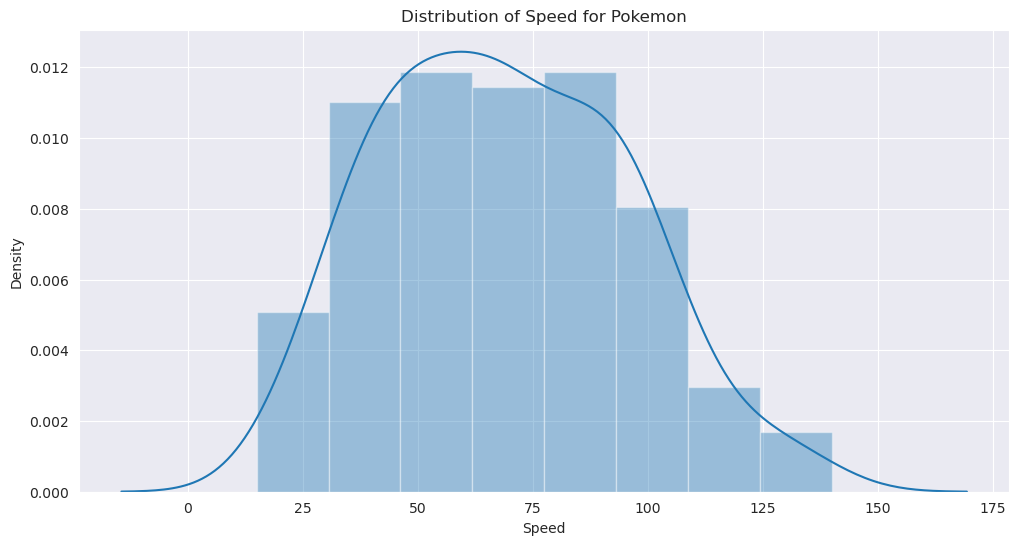

In [10]:
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")